## "Airline Customer Satisfaction Prediction Using Logistic Regression"

### STEP 1: DATA COLLECTION

### IMPORT ALL THE REQUIRED LIBRARIES FOR THIS PROJECT

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder

# ML Model
from sklearn.linear_model import LogisticRegression

# Feature Selection
from sklearn.feature_selection import RFE, RFECV

# Train-Test Split
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    roc_curve,
    auc,
    roc_auc_score
)


# warnings
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("flare")

### STEP 2: LOAD THE DATA

In [2]:
# Load the Data - 
A = pd.read_csv('Invistico_Airline.csv')

# We create a copy so that tracing back for errors or comparison becomes easy and we'll work on this copy
df = A.copy()

### STEP 3: DATA UNDERSTANDING

In [3]:
# To check the shape (rows x columns) use shape attribute
df.shape

(129880, 23)

In [4]:
# To Check the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
# To check the statistical analysis of the dataset
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
# To check for Categorical Values
df.describe(include="O")

,satisfaction,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880,129880
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,71087,65899,106100,89693,62160


In [7]:
# to fetch full columns and rows
pd.set_option('display.max_columns', None)   # Show all columns
pd.set_option('display.max_rows', None)      # Show all rows (be careful)
pd.set_option('display.width', None)         # No wrapping
pd.set_option('display.max_colwidth', None)  # Show full cell content

In [8]:
# To fetch the sample rows 
df.sample(30) # 5 is arguemnt given

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
115909,satisfied,Female,Loyal Customer,55,Business travel,Business,3278,2,4,2,2,4,3,3,5,5,5,5,2,5,1,27,26.0
21222,dissatisfied,Male,Loyal Customer,25,Personal Travel,Eco,1361,3,1,3,4,4,3,4,4,1,1,4,4,4,4,72,78.0
108740,satisfied,Female,Loyal Customer,60,Business travel,Business,3668,4,3,4,4,5,5,5,4,4,4,4,4,4,3,0,1.0
113254,satisfied,Female,Loyal Customer,40,Business travel,Business,3133,4,4,4,4,5,4,4,5,5,5,4,4,5,5,0,0.0
75100,dissatisfied,Male,Loyal Customer,72,Business travel,Eco Plus,2945,2,4,4,4,2,2,2,2,2,1,3,1,3,2,55,34.0
119927,satisfied,Male,Loyal Customer,47,Business travel,Business,277,1,1,1,1,5,4,5,5,5,5,5,3,5,4,0,0.0
45421,dissatisfied,Female,disloyal Customer,29,Business travel,Eco,1976,2,1,1,3,4,1,4,4,3,4,2,3,3,4,26,22.0
29031,dissatisfied,Male,Loyal Customer,35,Personal Travel,Eco,2074,3,5,3,1,5,3,2,5,4,2,2,3,5,5,0,0.0
31739,dissatisfied,Male,Loyal Customer,38,Personal Travel,Eco,1275,3,5,3,5,3,3,3,3,4,2,3,5,5,3,68,59.0
36226,dissatisfied,Female,Loyal Customer,25,Personal Travel,Eco,1207,4,4,4,5,3,4,1,3,5,2,4,3,4,3,0,0.0


In [9]:
# To Fetch the first 5 rows from the dataset
df.head(6)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0


In [10]:
# To Fetch the last 5 rows from the dataset
df.tail(6)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129874,satisfied,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,5,5,2,2,5,2,2,3,5,3,5,4,2,5,0.0
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,3,3,3,3,4,5,5,5,3,3,3,185,186.0


#### Identify all categorical columns


In [11]:
cat_cols = df.select_dtypes(include=['object']).columns

# Clean each categorical column
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()


### STEP 4: DATA CLEANING - 

#### a) CHECK FOR MISSING VALUES

In [12]:
# To check for missing values in the dataset
print("Null Values In Each Column:\n",(df.isna().sum().sort_values()))
print("TOTAL NULL VALUES: ",df.isna().sum().sum())

Null Values In Each Column:
 satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64
TOTAL NULL VALU

#### b) HANDLE MISSING VALUES

In [13]:
# Get % NA by Column
print("NA Count Percentage = ")
print((df.isna().sum().sort_values(ascending=False))/len(df)*100)
print("TOTAL NA COUNT % = \n",(df.isna().sum().sort_values(ascending=False).sum())/len(df)*100)

# No of row affected by NA
na_rows = df.isna().any(axis=1).sum()
print(na_rows)

# % of rows impacted by removing NA's
NA_row_percent = (na_rows / len(df)) * 100
print(f"{NA_row_percent:.3f}% rows have missing values")

NA Count Percentage = 
Arrival Delay in Minutes             0.302587
Gender                               0.000000
satisfaction                         0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Customer Type                        0.000000
Flight Distance                      0.000000
Seat comfort                         0.000000
Food and drink                       0.000000
Departure/Arrival time convenient    0.000000
Inflight wifi service                0.000000
Inflight entertainment               0.000000
Online support                       0.000000
Gate location                        0.000000
Ease of Online booking               0.000000
On-board service                     0.000000
Baggage handling                     0.000000
Leg room service                     0.000000
Checkin service                      0.000000
Cleanliness                          0.000000
Online boar

####  IMPUTE MISSING VALUES (NUMERICAL COLUMNS) 

In [14]:
# since there was only one column with null values we could have dropped but it is efficient to impute and keep all the records
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

#### CHECK AGAIN FOR MISSING VALUES

print("COLUMN_WISE = ",df.isnull().sum())
print("DATAFRAME_WISE = ",df.isnull().sum().sum())

COLUMN_WISE =  satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64
DATAFRAME_WISE =  0


In [15]:
# CHANGE THE NECESSARY DATATYPES OF THE COLUMNS
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype('int')

#### CHECK FOR THE DUPLICATE VALUES

In [16]:
df.duplicated().sum()
# Remove duplicates
df = df.drop_duplicates()

#### CHECK FOR THE UNIQUENESS

In [17]:
uniqueness = df.nunique(dropna=False).sort_values(ascending=False)
print(uniqueness)

n_rows = len(df)
unique_cols = [c for c in df.columns if df[c].nunique(dropna=False) == n_rows]
print(unique_cols)
near_unique_cols = [c for c in df.columns if df[c].nunique(dropna=False) > 0.95 * n_rows and c not in unique_cols]
print(near_unique_cols)

Flight Distance                      5398
Arrival Delay in Minutes              472
Departure Delay in Minutes            466
Age                                    75
Seat comfort                            6
Departure/Arrival time convenient       6
Inflight wifi service                   6
Ease of Online booking                  6
Online support                          6
On-board service                        6
Leg room service                        6
Online boarding                         6
Inflight entertainment                  6
Food and drink                          6
Gate location                           6
Cleanliness                             6
Checkin service                         6
Baggage handling                        5
Class                                   3
Type of Travel                          2
satisfaction                            2
Gender                                  2
Customer Type                           2
dtype: int64
[]
[]


#### CHECK FOR THE QUASI-CONSTANT VALUES

In [18]:
threshold = 0.75* len(df)
cols_with_majority_same = [col for col in df.columns if df[col].value_counts(dropna=False).max() >= threshold]
print("\
Columns with 75%+ same values:")
print(cols_with_majority_same)

Columns with 75%+ same values:
['Customer Type']


#### As we know, In the earlier process, class is an important column which will affect the results if we drop it so even if it is quasi constant we won't drop the column.

#### STEP 5: OUTLIER DETECTION

In [19]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_summary = {}
for col in numeric_cols:
    outliers = detect_outliers(df, col)
    outliers_summary[col] = len(outliers)

print("Outliers in numeric columns:")
print(outliers_summary)

Outliers in numeric columns:
{'Age': 0, 'Flight Distance': 2581, 'Seat comfort': 0, 'Departure/Arrival time convenient': 0, 'Food and drink': 0, 'Gate location': 0, 'Inflight wifi service': 0, 'Inflight entertainment': 0, 'Online support': 0, 'Ease of Online booking': 0, 'On-board service': 13270, 'Leg room service': 0, 'Baggage handling': 0, 'Checkin service': 15370, 'Cleanliness': 0, 'Online boarding': 0, 'Departure Delay in Minutes': 18098, 'Arrival Delay in Minutes': 17492}


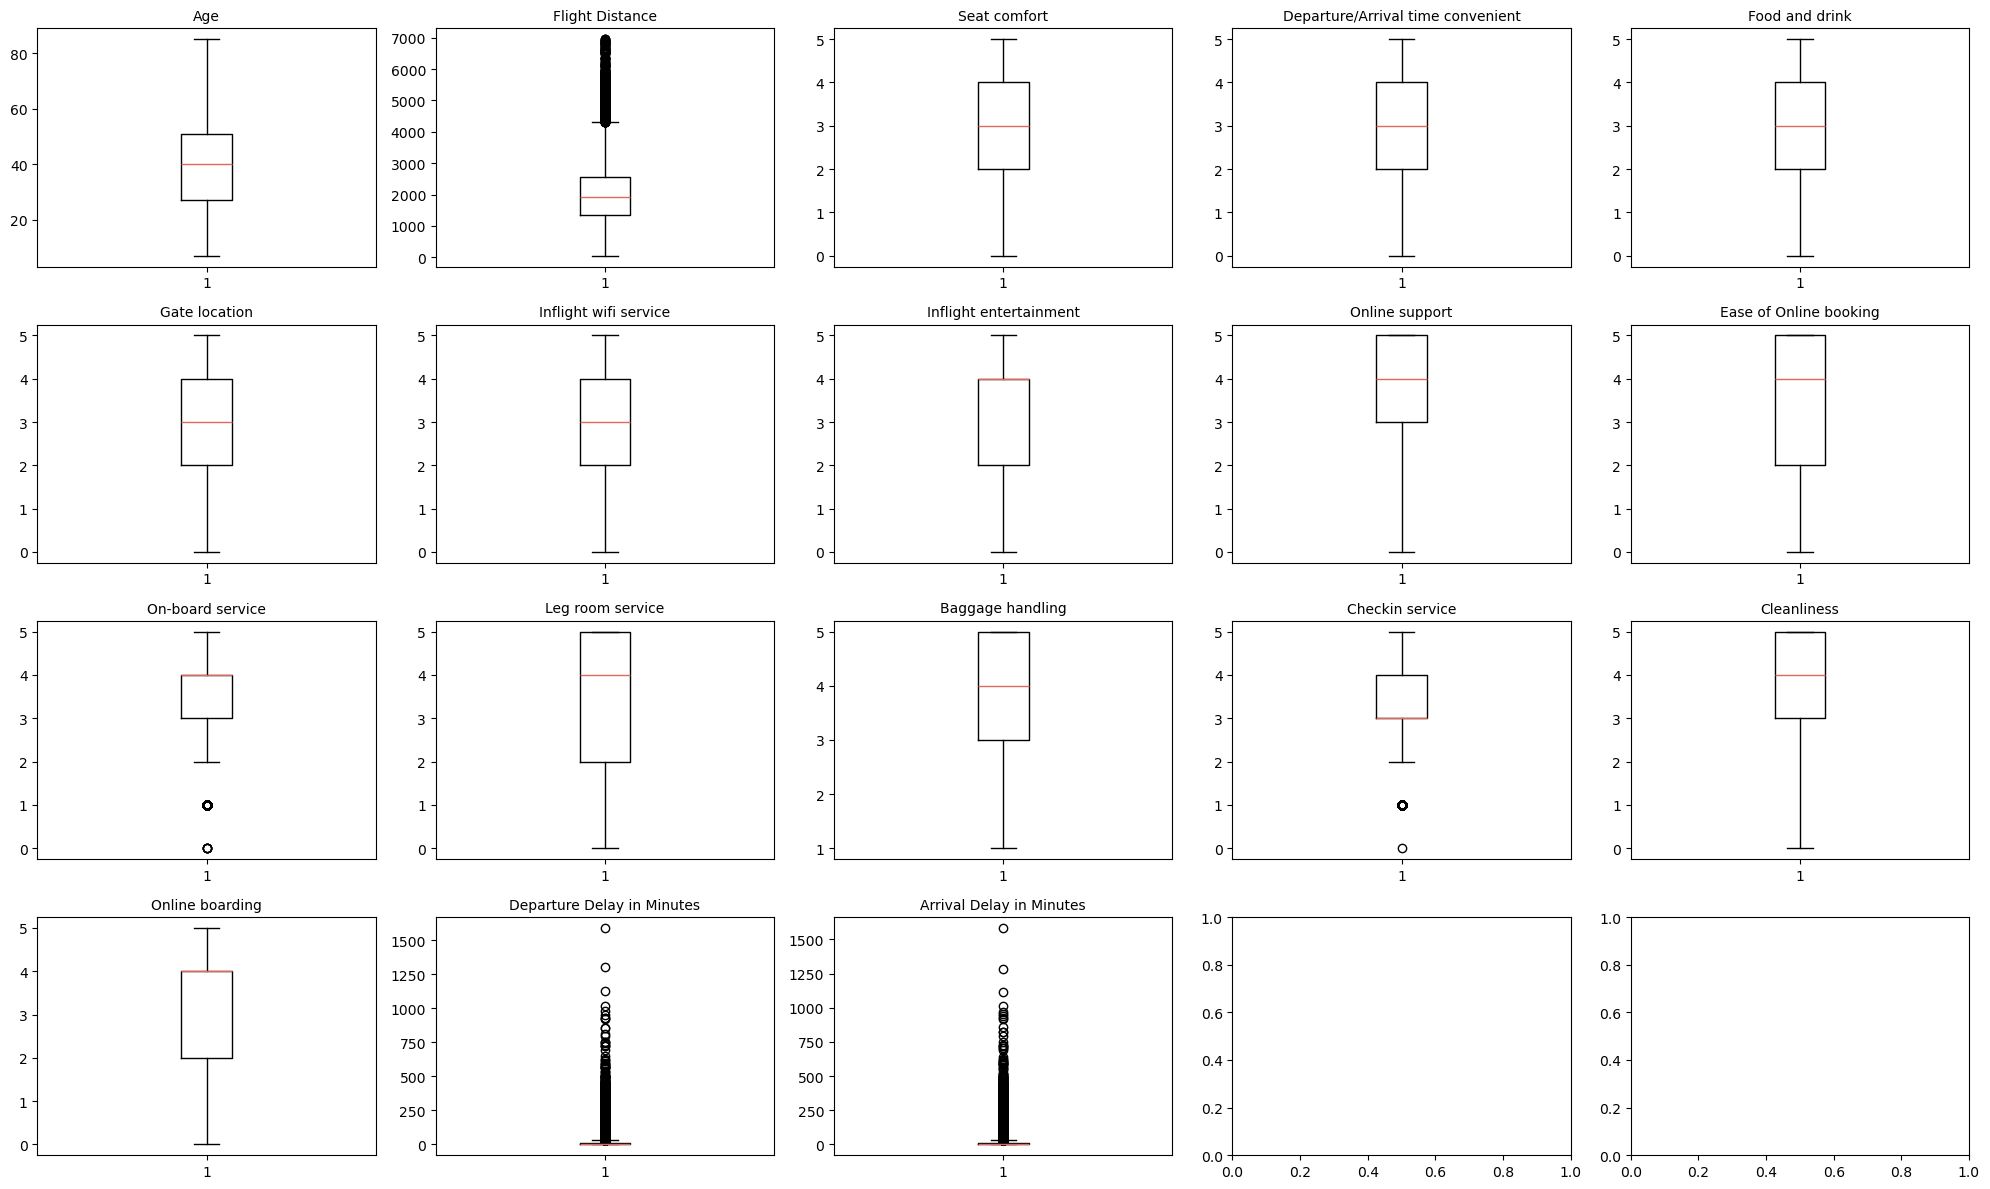

In [20]:
fig, axes = plt.subplots(4, 5, figsize=(20, 12))
for idx, col in enumerate(numeric_cols):
    if idx < len(axes.flat):
        row, col_idx = divmod(idx, 5)
        axes[row, col_idx].boxplot(df[col].dropna())
        axes[row, col_idx].set_title(col, fontsize=10)
plt.tight_layout()
plt.show()

#### STEP 5.1 - OUTLIER TREATMENT

Outliers clipped successfully!


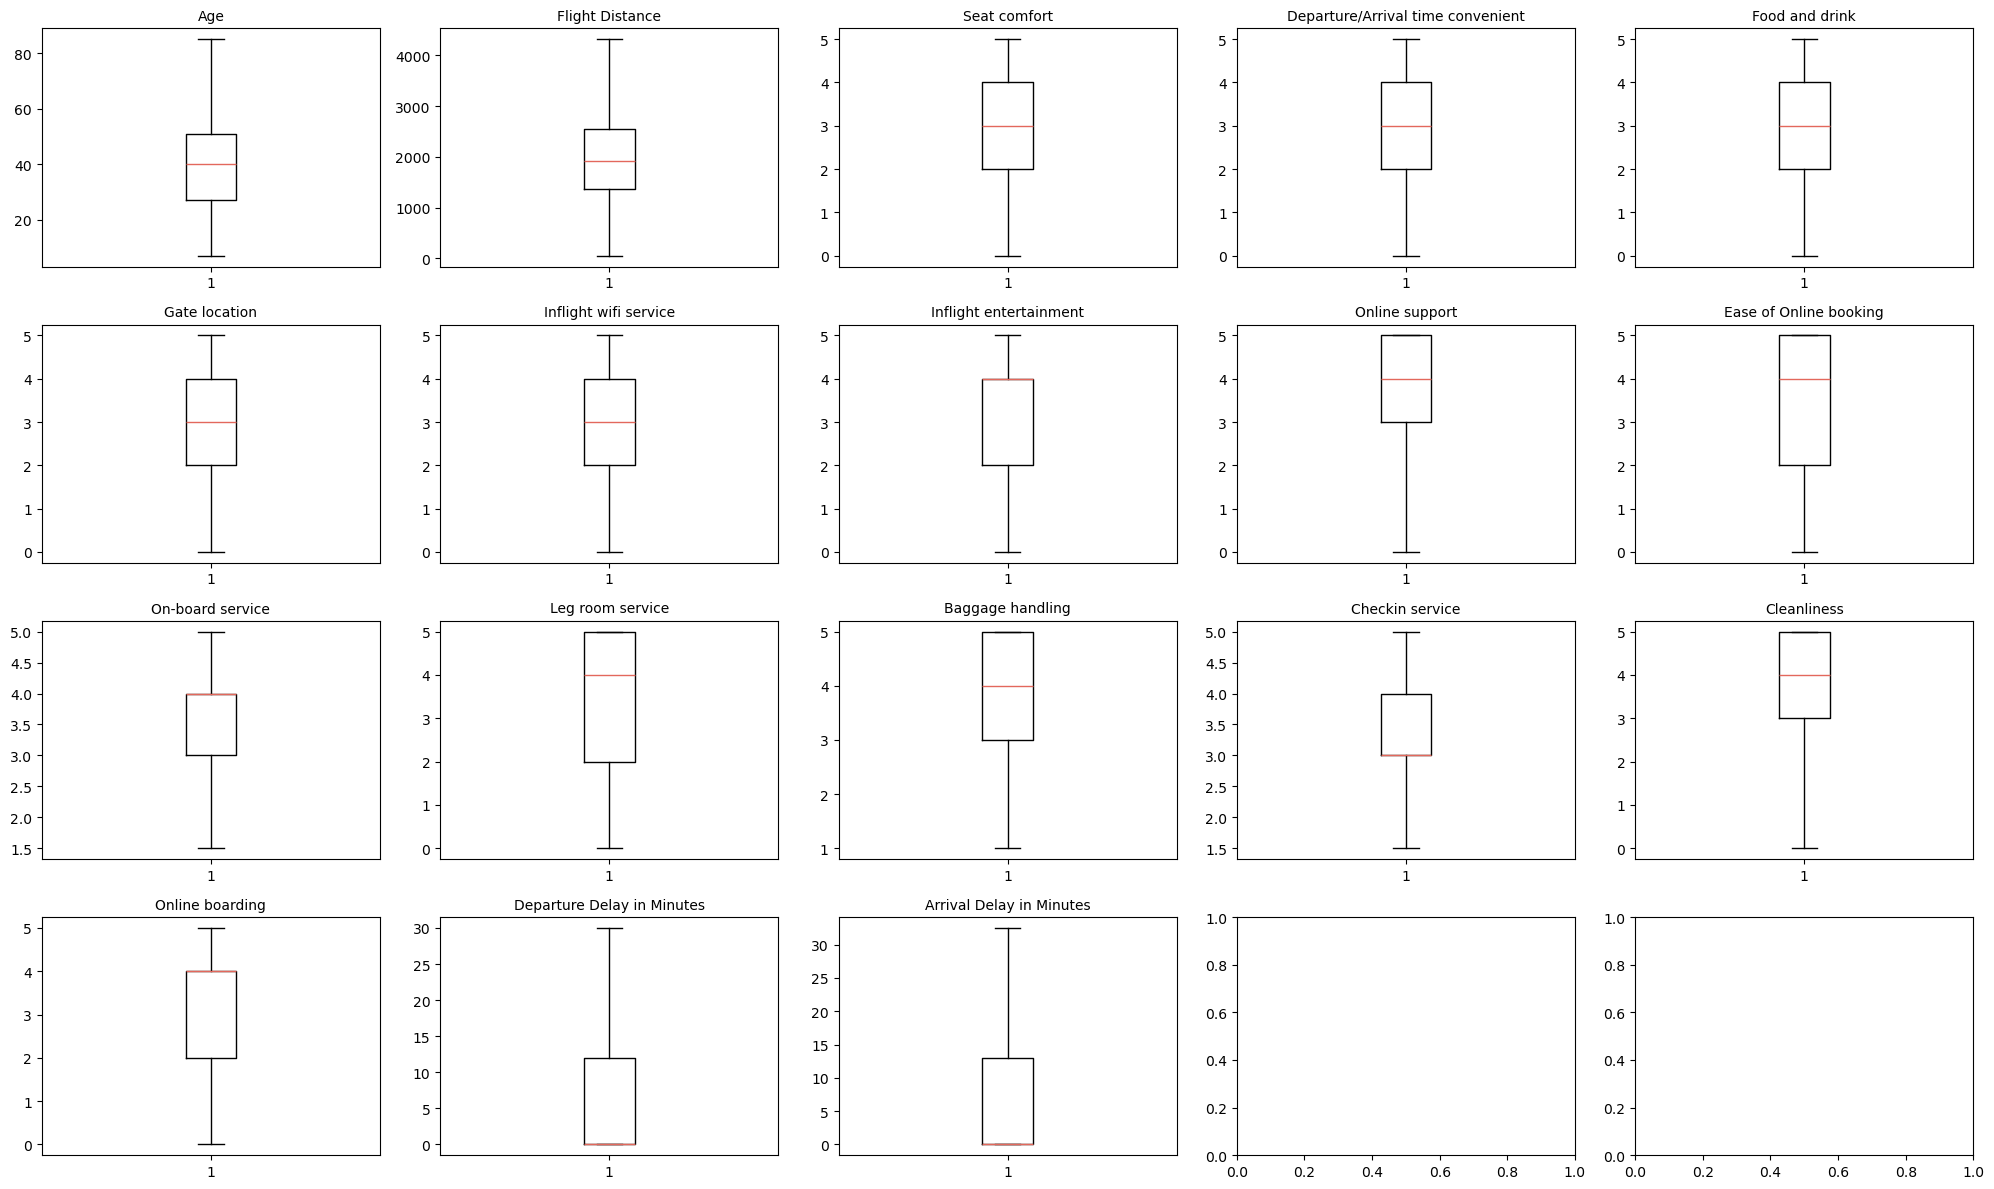

In [21]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Clip values to bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
print("Outliers clipped successfully!")

# Verify - check boxplots again
fig, axes = plt.subplots(4, 5, figsize=(20, 12))
for idx, col in enumerate(numeric_cols):
    if idx < len(axes.flat):
        row, col_idx = divmod(idx, 5)
        axes[row, col_idx].boxplot(df[col].dropna())
        axes[row, col_idx].set_title(col, fontsize=10)
plt.tight_layout()
plt.show()

In [22]:
outliers_summary = {}
for col in numeric_cols:
    outliers = detect_outliers(df, col)
    outliers_summary[col] = len(outliers)

print("Outliers in numeric columns:")
print(outliers_summary)

Outliers in numeric columns:
{'Age': 0, 'Flight Distance': 0, 'Seat comfort': 0, 'Departure/Arrival time convenient': 0, 'Food and drink': 0, 'Gate location': 0, 'Inflight wifi service': 0, 'Inflight entertainment': 0, 'Online support': 0, 'Ease of Online booking': 0, 'On-board service': 0, 'Leg room service': 0, 'Baggage handling': 0, 'Checkin service': 0, 'Cleanliness': 0, 'Online boarding': 0, 'Departure Delay in Minutes': 0, 'Arrival Delay in Minutes': 0}


#### HEATMAP CORRELATION MATRIX 

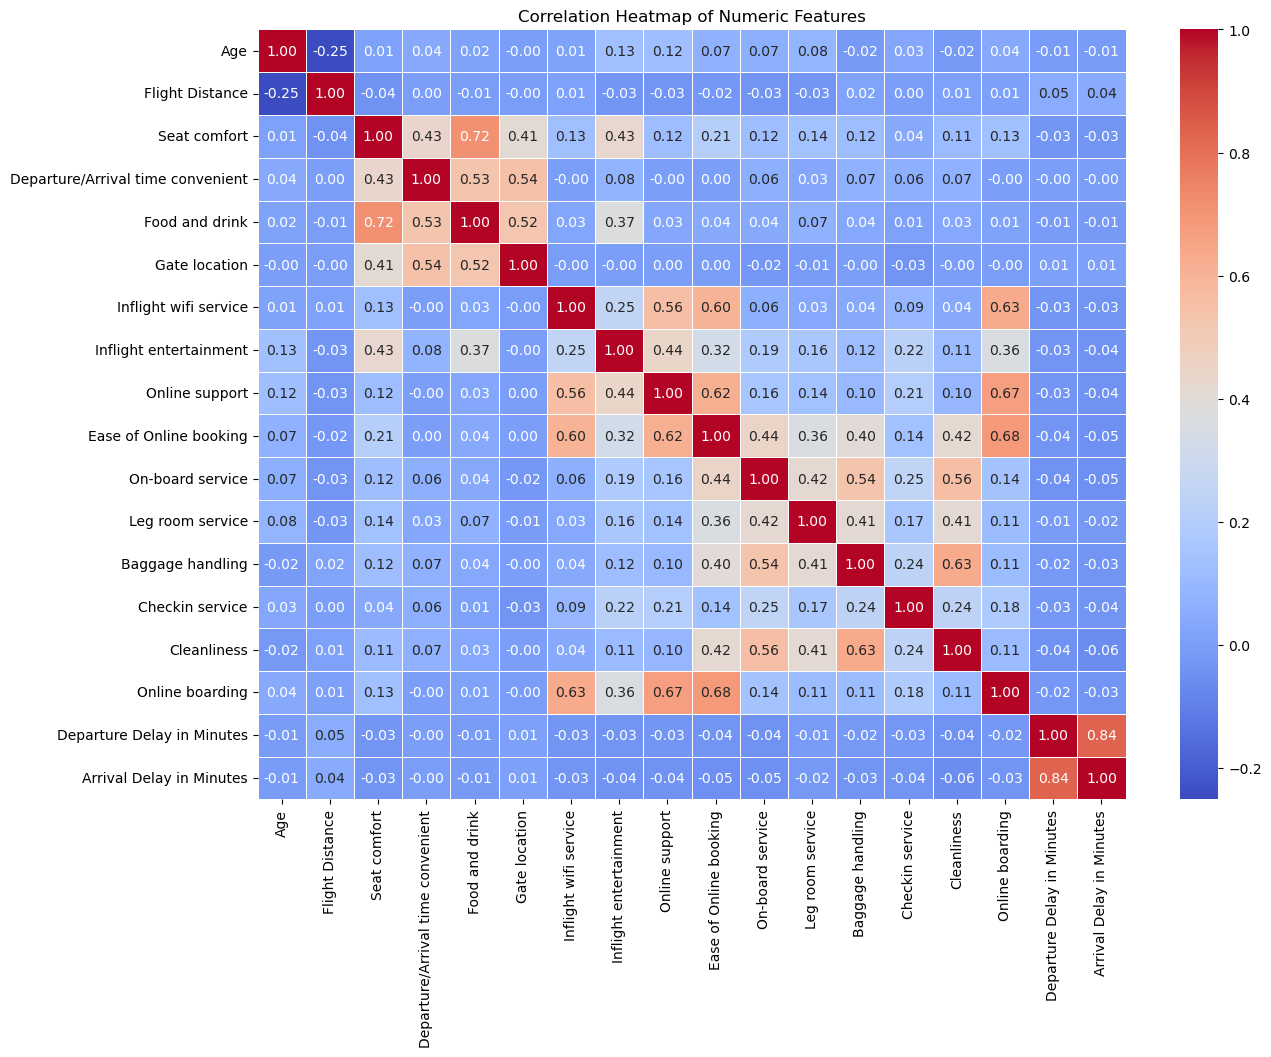

In [23]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Numeric Features")
plt.show()


### STEP 6: LABEL ENCODING

In [25]:
# List of categorical columns
cat_cols = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to each column
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [26]:
print(df[cat_cols].dtypes)

satisfaction      int64
Gender            int64
Customer Type     int64
Type of Travel    int64
Class             int64
dtype: object


### STEP 7: DEFINE X AND Y

In [27]:
# Prepare features and target

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [28]:
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")

Features shape: (129880, 22)
Target shape: (129880,)
Target distribution:
satisfaction
1    71087
0    58793
Name: count, dtype: int64


### ANNOVA TEST -

Columns meaning:

F_Score → How strongly the feature separates the target classes

p_value → Probability this separation happened by chance

Rule:

p < 0.05 → significant

Higher F-score → stronger feature

In [29]:
from sklearn.feature_selection import f_classif
import pandas as pd

f_scores, p_values = f_classif(X, y)

anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': f_scores,
    'p_value': p_values
}).sort_values(by='p_value')

anova_results


,Feature,F_Score,p_value
0,Gender,6126.187829,0.000000e+00
1,Customer Type,12159.896135,0.000000e+00
2,Age,1833.056185,0.000000e+00
3,Type of Travel,1568.565108,0.000000e+00
4,Class,10957.449490,0.000000e+00
6,Seat comfort,8106.626158,0.000000e+00
10,Inflight wifi service,7060.130966,0.000000e+00
8,Food and drink,1919.346091,0.000000e+00
14,On-board service,18785.969235,0.000000e+00
13,Ease of Online booking,29761.100914,0.000000e+00


### STEP 8: TRAIN-TEST SPLIT INTO 80:20 RATIO

In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Training set: (103904, 22)
Test set: (25976, 22)


#### STEP 9: CLASS IMBALANCE ANALYSIS

Counts of each class
satisfaction
1    71087
0    58793
Name: count, dtype: int64


(129880, 23)

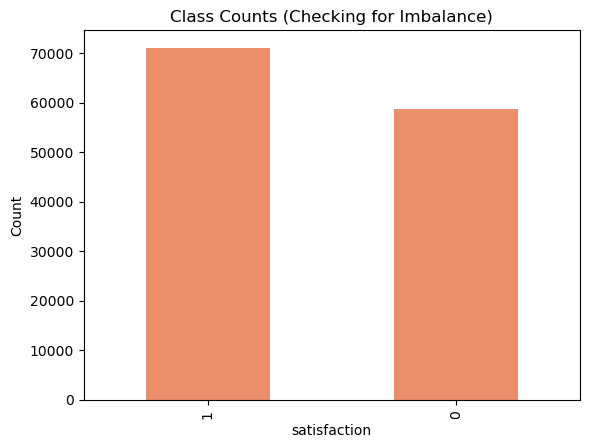

In [31]:
print("Counts of each class")
print(df['satisfaction'].value_counts())
df['satisfaction'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Class Counts (Checking for Imbalance)')
df.shape

#### DATA IS WELL BALANCED

#### STEP 10: FEATURE SELECTION USING RFE

In [32]:
# 1. Create Logistic Regression model
log_reg = LogisticRegression(max_iter=1000,random_state=42)

# 2. Create RFE selector
# choose number of features you want to keep, 
rfe = RFE(estimator=log_reg, n_features_to_select=10)

# 3. Fit RFE on TRAINING data only
rfe.fit(X_train, y_train)

# 4. Get selected features
selected_features = X_train.columns[rfe.support_]

print("Selected Features (RFE):")
for feature in selected_features:
    print(feature)

Selected Features (RFE):
Gender
Customer Type
Type of Travel
Class
Seat comfort
Food and drink
Inflight entertainment
Ease of Online booking
On-board service
Checkin service


In [33]:
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

### STEP 10: MODELLING

In [34]:
log_reg.fit(X_train_rfe, y_train)

LogisticRegression(max_iter=1000, random_state=42)

#### STEP 11: PREDICTIONS

In [35]:
y_pred = log_reg.predict(X_test_rfe)
y_prob = log_reg.predict_proba(X_test_rfe)[:,1]

#### STEP 12: MODEL EVALUATION

In [36]:
from sklearn.metrics import *

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.8309978441638436
Precision: 0.8425712891305863
Recall: 0.8500386860800451
F1: 0.8462885154061625
ROC-AUC: 0.9027347414864288


#### STEP 13: CONFUSION MATRIX

In [37]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Confusion Matrix:
 [[ 9501  2258]
 [ 2132 12085]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81     11759
           1       0.84      0.85      0.85     14217

    accuracy                           0.83     25976
   macro avg       0.83      0.83      0.83     25976
weighted avg       0.83      0.83      0.83     25976



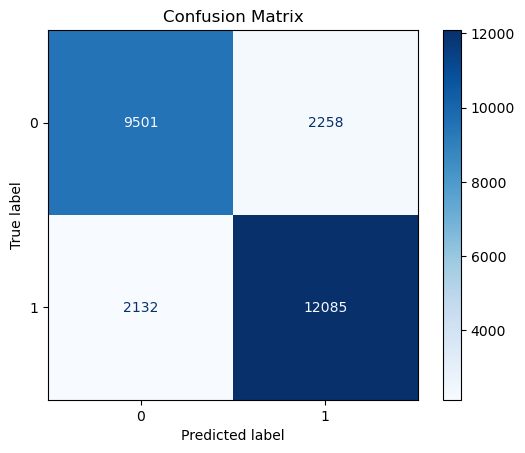

In [38]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')

plt.title("Confusion Matrix")
plt.show()

#### STEP 14: ROC CURVE

In [39]:
auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC-SCORE: {round(auc*100,2)} % ")

ROC-AUC-SCORE: 90.27 % 


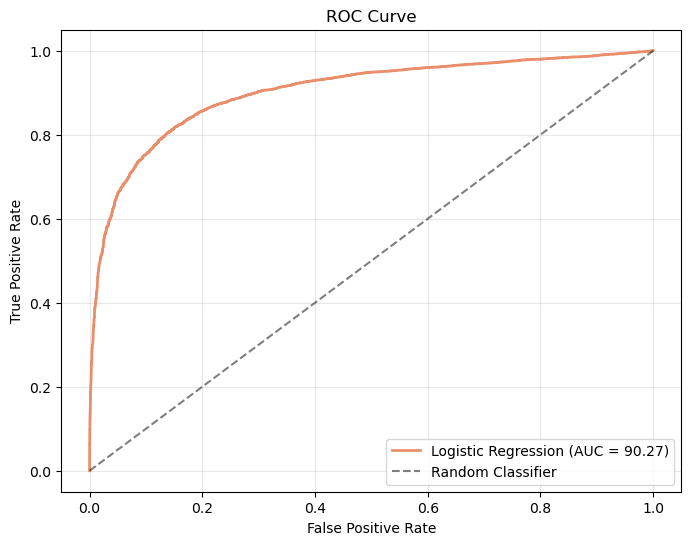

In [40]:
# 10.4 ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score*100:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
